#the other type of seupervised machine learning is classification
# Classification algorithims are used to assign input examples to predifined categories or class

In [48]:
import pandas as pd 

In [49]:
health=pd.read_csv("Heart_Disease_Prediction.csv")

In [50]:
health

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [51]:
#in logistics regression there are only two targets (true/false) present/abscent
#when using this type ypu have to convert all strings aka categorical to  numerical
#.map is used to convert categorical to numerical

In [52]:
health["Heart Disease"].map({"Presence":1,"Absence":0})

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64

In [86]:
health.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease                int64
dtype: object

In [53]:
health["Heart Disease"]=health["Heart Disease"].map({"Presence":1,"Absence":0})

In [54]:
health

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [55]:
health.corr()["Heart Disease"]

Age                        0.212322
Sex                        0.297721
Chest pain type            0.417436
BP                         0.155383
Cholesterol                0.118021
FBS over 120              -0.016319
EKG results                0.182091
Max HR                    -0.418514
Exercise angina            0.419303
ST depression              0.417967
Slope of ST                0.337616
Number of vessels fluro    0.455336
Thallium                   0.525020
Heart Disease              1.000000
Name: Heart Disease, dtype: float64

In [80]:
x=health.iloc[0:,0:-1]
y=health.iloc[0:,-1]

In [81]:
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64

In [57]:
#spli an train the data
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_text=train_test_split(x,y, test_size=0.6, random_state=0)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
model=LogisticRegression().fit(x_train,y_train)

C:\Users\DELL XPS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
prediction=model.predict(x_train)

In [62]:
y_train

0      1
94     1
95     1
220    1
69     1
      ..
251    0
192    0
117    1
47     1
172    1
Name: Heart Disease, Length: 108, dtype: int64

In [63]:
#predict if a man will have a heart disesase
#if age:60
#chest pain:5,
#bp:150
#cholesterol:300
#fbs over 120:0
#EKG results:1
#max Hr:100
#Excercise Angina:1
#ST depression:2.0
#slope of ST: 1
#number of vessel fluids:1
#thallium:2

model.predict([[60,1,5,150,300,0,1,100,1,2.0,1,1,2]])

array([1], dtype=int64)

In [64]:
#put original output and predicted output together
table=pd.DataFrame(y_train)
table["prediction"]=model.predict(x_train)

In [65]:
table

,Heart Disease,prediction
0,1,1
94,1,1
95,1,1
220,1,1
69,1,0
...,...,...
251,0,0
192,0,0
117,1,1
47,1,1


# confusion matrix

In [71]:
# sklearn.metrics is used to evaluate classification algorithim

#EVALUATIING THE MODEL

from sklearn.metrics import confusion_matrix
a=confusion_matrix(table["Heart Disease"], table["prediction"])


In [68]:
#from the output 
#the first 52 is a true positive, 6, false positive
#the 6 is true negative, 44 false negative

<AxesSubplot:>

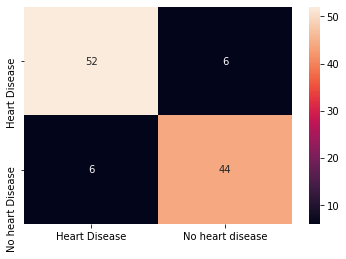

In [74]:
import seaborn as sns
sns.heatmap(a,annot=True,xticklabels=["Heart Disease","No heart disease"],yticklabels=["Heart Disease","No heart Disease"])
#annot is used to display the value

In [77]:
# classification report
from sklearn.metrics import classification_report

In [78]:
print(classification_report(table["Heart Disease"],table["prediction"]))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        58
           1       0.88      0.88      0.88        50

    accuracy                           0.89       108
   macro avg       0.89      0.89      0.89       108
weighted avg       0.89      0.89      0.89       108



In [79]:
#accuracy = true positive(tp)/tp+fp

In [85]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, prediction)

0.8888888888888888